

# 第6章 卷积神经网络CNN
## 6.1 卷积
### 6.1.1 什么是卷积？

In [1]:
import numpy as np
np.random.seed(5)
x = np.random.randint(low=1, high=30, size=10,dtype='l')
print(x)

w = np.array([1.2,0.3,0.5])
n = x.size
K = w.size
z = np.zeros(n-K+1)
for i in range(n-K+1):   
    z[i] = np.sum(x[i:i+K]*w)
print(w)
print(z)

[ 4 15 16  7 23 17 10  9  5  8]
[1.2 0.3 0.5]
[17.3 26.3 32.8 23.8 37.7 27.9 17.2 16.3]


In [2]:
def conv1d(x,w,pad):
    n = x.size
    K = w.size
    P = 2*pad
    n_o = n+P-K+1
    y = np.zeros(n_o)
    if P>0:
        x_pad = np.zeros(n+P)   
        x_pad[pad:-pad] = x
    else: 
        x_pad = x   
    
    for i in range(n_o): 
        y[i] = np.sum(x_pad[i:i+K]*w)
    return y

In [3]:
y1 = conv1d(x,w,1)    #same卷积
print(x.size,w.size,y1.size)
print("same: ", y1) 

y2 = conv1d(x,w,2)     #full卷积
print(x.size,w.size,y2.size)
print("full: ", y2) 

10 3 10
same:  [ 8.7 17.3 26.3 32.8 23.8 37.7 27.9 17.2 16.3  8.4]
10 3 12
full:  [ 2.   8.7 17.3 26.3 32.8 23.8 37.7 27.9 17.2 16.3  8.4  9.6]


带有跨度的卷积运算

In [4]:
def conv1d(x,w,pad=0,s=1): 
    n = x.size
    K = w.size   
    n_o = (n+2*pad-K)//s+1
    y = np.zeros(n_o)             #卷积结果   
    
    if not pad==0:
        #x_pad = np.zeros(n+2*pad)
        #x_pad[pad:-pad] = x    
        x_pad = np.pad(x,[(pad,pad)], mode='constant')
    else:
        x_pad = x
    
    for i in range(n_o):     # Loop over every pixel of the image
        y[i] = np.sum(x_pad[i*s:i*s+K]*w)            
    return y

In [5]:
y0 = conv1d(x,w,0) 
y1 = conv1d(x,w,0,s=2)    
y2 = conv1d(x,w,1,s=2)  
print(y0)
print(y1)
print(y2)

[17.3 26.3 32.8 23.8 37.7 27.9 17.2 16.3]
[17.3 32.8 37.7 17.2]
[ 8.7 26.3 23.8 27.9 16.3]


### 6.1.2 一维信号的卷积

卷积用于对数据如一维信号或二维图像等进行处理，可以去除数据中的噪声或得到数据里蕴含的某种特征。

下面生成了2组数x和y，x是$[0,2\pi]$上均匀分布的一组数（100个），而y是对应地正弦曲线sin(x)附近的数（即y是对正弦曲线的噪声采样）：


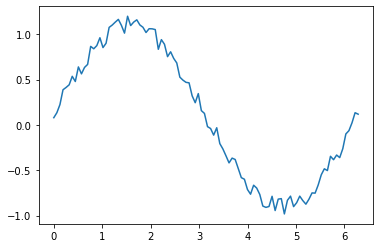

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 0.2

plt.plot(x,y)
plt.show()

下面代码根据正态分布，生成一组权值向量（卷积核）w：

[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5]
['0.00', '0.00', '0.01', '0.05', '0.12', '0.20', '0.23', '0.20', '0.12', '0.05', '0.01', '0.00']


<BarContainer object of 12 artists>

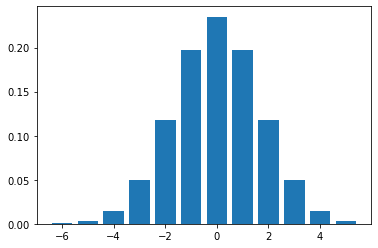

In [7]:
sigma=1.6986436005760381
x_for_w = np.arange(-6, 6)
w = np.exp(-(x_for_w) ** 2 / (2 * sigma ** 2))
w/= sum(w)
print(x_for_w)
print(["%0.2f" % x for x in w])
plt.bar(x_for_w, w)

这个权值向量w的中间值大、两边值小，并且所有权值之和为1，用这个权值向量w对y进行卷积：

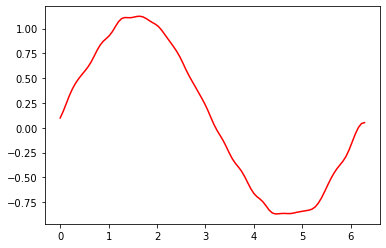

In [8]:
#w = np.array([0.1,0.2, 0.5, 0.2, 0.1])
yhat = np.correlate(y, w,"same")
plt.plot(x,yhat, color='red')

### 6.1.3 二维卷积

/Users/lhc456/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


image matrix size:  (233, 328, 3)
image matrix size:  (233, 328)

 First 5 columns and rows of the color image matrix: 
 [[[143 106  88]
  [141 104  86]
  [150 108  94]
  [144 102  88]
  [137  95  81]]

 [[108  78  68]
  [106  76  66]
  [107  77  67]
  [101  71  61]
  [ 92  62  52]]

 [[159 138 133]
  [160 139 134]
  [167 149 145]
  [167 149 145]
  [167 149 145]]

 [[225 213 215]
  [227 215 217]
  [220 216 217]
  [220 216 217]
  [220 216 217]]

 [[206 203 210]
  [207 204 211]
  [204 209 215]
  [204 209 215]
  [204 209 215]]]

 First 5 columns and rows of the gray image matrix: 
 [[0.4414302  0.43358706 0.45457098 0.43104157 0.40359059]
 [0.3280549  0.32021176 0.32413333 0.30060392 0.2653098 ]
 [0.55726275 0.56118431 0.59818275 0.59818275 0.59818275]
 [0.84585961 0.85370275 0.8506749  0.8506749  0.8506749 ]
 [0.80055765 0.80447922 0.81713765 0.81713765 0.81713765]]


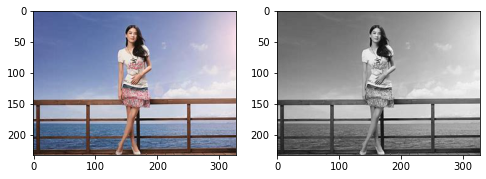

In [9]:
from skimage import io, transform
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread('image.jpg')
gray_img = rgb2gray(img) #  io.imread('./imgs/image.jpg', as_grey=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(gray_img,cmap='gray')
#img = io.imread('./imgs/lenna.png', as_grey=True)  # load the image as grayscale
#plt.imshow(img, cmap='gray')
print('image matrix size: ', img.shape)      # print the size of image
print('image matrix size: ', gray_img.shape)      # print the size of image
print('\n First 5 columns and rows of the color image matrix: \n', img[150:155,110:115])
print('\n First 5 columns and rows of the gray image matrix: \n', gray_img[150:155,110:115]) 

颜色值也可以从`[0,1]`区间的实数值转化为`[0,255]`的整数值，下面代码将灰度图像的像素值转化到`[0,255]`区间整数。

In [10]:
gray_img2 = gray_img*255
gray_imgs= gray_img2.astype(np.uint8)
print('灰度矩阵的前5行5列的数值: \n', gray_imgs[150:155,110:115]) 

灰度矩阵的前5行5列的数值: 
 [[112 110 115 109 102]
 [ 83  81  82  76  67]
 [142 143 152 152 152]
 [215 217 216 216 216]
 [204 205 208 208 208]]


下面是对二维矩阵（图像的）进行“valid卷积”操作的代码实现：

In [11]:
def convolve2d(X, K): 
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):           
            Y[i, j] = (X[i: i + h, j: j + w] * K).sum() 
    return Y

In [12]:
X= np.array([[2,3,0,7,9,5], [6,0,4,7,2,3], [8,1,0,3,2,6],
             [7,6,1,5,2,8], [9,5,1,8,3,7], [2,4,1,8,6,5]])
K = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print("X: ",X)
print("K: ",K)
convolve2d(X,K)

X:  [[2 3 0 7 9 5]
 [6 0 4 7 2 3]
 [8 1 0 3 2 6]
 [7 6 1 5 2 8]
 [9 5 1 8 3 7]
 [2 4 1 8 6 5]]
K:  [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]


array([[-14.,  20.,   7.,  -7.],
       [-24.,  10.,   3.,   5.],
       [-28.,   3.,   6.,   8.],
       [-23.,   9.,  10.,  -2.]])

用这个卷积核对图像进行卷积操作:

原图像大小： (233, 328)
结果图像大小： (231, 326)


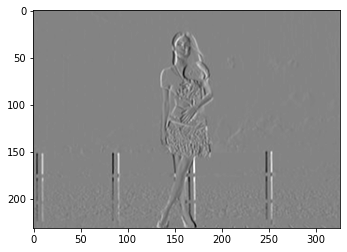

In [13]:
image = gray_img
kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])
image_sharpen = convolve2d(image,kernel)
plt.imshow(image_sharpen, cmap=plt.cm.gray)
print("原图像大小：",image.shape)
print("结果图像大小：",image_sharpen.shape)

可以看到，结果图像的垂直特征被放大了。表明这个一个具有“垂直边缘提取”作用的卷积核。

下面的代码对图像的上下、左右各填充了P_h,P_w个0值：

In [14]:
H,W = X.shape
P_h,P_w = 1,2
X_padded = np.zeros((H + 2*P_h, W +2*P_w))   
X_padded[P_h:-P_h, P_w:-P_w] = X

In [15]:
print(X_padded)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 3. 0. 7. 9. 5. 0. 0.]
 [0. 0. 6. 0. 4. 7. 2. 3. 0. 0.]
 [0. 0. 8. 1. 0. 3. 2. 6. 0. 0.]
 [0. 0. 7. 6. 1. 5. 2. 8. 0. 0.]
 [0. 0. 9. 5. 1. 8. 3. 7. 0. 0.]
 [0. 0. 2. 4. 1. 8. 6. 5. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


下面代码对数组a的第一行前面填充一行0，而第1列的前面、最后一列的后面各填充1列0和2列0。

In [16]:
import numpy as np
a = np.array([[ 1.,  1.,  1.],
              [ 1.,  1.,  1.]])
b = np.pad(a, [(1, 0), (1, 2)], mode='constant')
print(a)
print(b)

[[1. 1. 1.]
 [1. 1. 1.]]
[[0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0.]]


same卷积

In [17]:
def convolve2d_same(X, K): 
    H,W = X.shape   
    K_h,K_w = K.shape
   
    P_h = (K_h)//2         #左右边缘填充的宽度
    P_w = (K_w)//2         #上下边缘填充的高度
    #Y = np.zeros_like(X)            #为什么这样会出错？
    Y = np.zeros((H,W)) 
   
    X_padded = np.pad(X, [(P_h, P_h), (P_w, P_w)], mode='constant')    
 #   X_padded = np.zeros((H + 2*P_h, W + 2*P_w))   
 #   X_padded[P_h:-P_h, P_w:-P_w] = X

    for i in range(Y.shape[0]):  
        for j in range(Y.shape[1]):
            Y[i,j]=(X_padded[i:i+K_h,j:j+K_w]*K).sum()     
    return Y

In [18]:
convolve2d_same(X,K)

array([[  6.,  -6.,  15.,  16.,  -8., -20.],
       [  4., -14.,  20.,   7.,  -7., -15.],
       [  8., -24.,  10.,   3.,   5.,  -8.],
       [ 18., -28.,   3.,   6.,   8.,  -9.],
       [ 20., -23.,   9.,  10.,  -2., -14.],
       [ 13., -10.,  11.,  12.,  -7., -15.]])

用这个“same卷积”操作对原图像执行卷积操作，将产生和原图像一样大小的结果图像。

原图像大小： (233, 328)
结果图像大小： (233, 328)


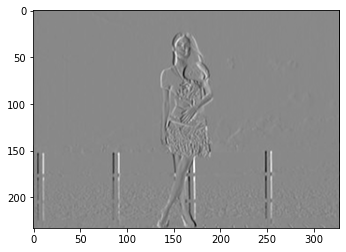

In [19]:
image = gray_img
kernel = np.array([[-1,0,1],
                   [-2,0,2],
                   [-1,0,1]])
image_sharpen = convolve2d_same(image,kernel)
plt.imshow(image_sharpen, cmap=plt.cm.gray)
print("原图像大小：",image.shape)
print("结果图像大小：",image_sharpen.shape)

不同的卷积核对图像进行卷积将产生不一样的结果，比如可以用一个可以“提取边缘”的卷积核对图像进行卷积

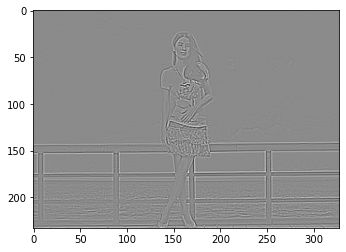

In [20]:
kernel = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])
edges = convolve2d_same(image,kernel)
plt.imshow(edges, cmap=plt.cm.gray)

scipy.signal模块有一个类似的函数convolve2d().和我们自己实现的卷积不同的是，它会先对卷积图像进行左右和上下翻转，然后再和卷积核对应元素值执行累加和。

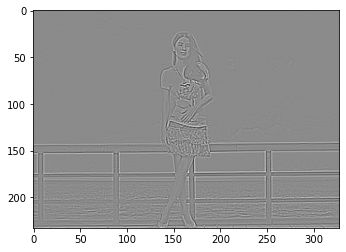

In [21]:
import scipy.signal
kernel = np.flipud(np.fliplr(kernel))    # 翻转卷积核
edges =scipy.signal.convolve2d(image, kernel, 'same')
plt.imshow(edges, cmap=plt.cm.gray)

用一个具有平滑作用的卷积核对图像进行平滑处理，这个卷积核用一个像素周围25个像素的平均值作为该像素的值。平滑处理后图像变得模糊了。

[[0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111 0.11111111 0.11111111]]


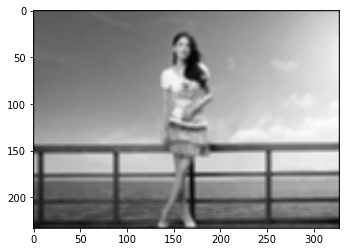

In [22]:
kernel = 1./9*np.ones((5,5)) 
print(kernel)
edges = convolve2d_same(image,kernel)
plt.imshow(edges, cmap=plt.cm.gray)

#### 跨度

上述的卷积操作的**跨度**是1，

$$\begin{aligned}(H-F_h+P_h)/S_h+1 \\(W-F_w+P_w)/S_w+1\end{aligned}\tag{6-4}$$

即综合填充和跨度的二维卷积操作的python代码如下：

In [26]:
def convolve2d(X, K,pad=(0,0),stride = (1,1)): 
    H,W = X.shape   
    K_h,K_w = K.shape
   
    P_h,P_w = pad
    S_h,S_w = stride  
   
    h = (H-K_h+2*P_h)//S_h+1
    w = (W-K_w+2*P_w)//S_w+1    
    Y = np.zeros((h,w)) 
   
    if P_h!=0 or  P_w !=0:
        X_padded = np.pad(X, [(P_h, P_h), (P_w, P_w)], mode='constant') 
    else:
        X_padded = X
    for i in range(Y.shape[0]):
        hs = i*S_h
        for j in range(Y.shape[1]):
            ws = j*S_w
            Y[i,j]=(X_padded[hs:hs+K_h,ws:ws+K_w]*K).sum()     
    return Y

对之前的二维矩阵和卷积核K执行下面的卷积操作的结果。

In [27]:
X= np.array([[2,3,0,7,9,5], [6,0,4,7,2,3], [8,1,0,3,2,6],[7,6,1,5,2,8], [9,5,1,8,3,7], [2,4,1,8,6,5]])
convolve2d(X,K,(1,1),(2,2))

array([[ 6., 15., -8.],
       [ 8., 10.,  5.],
       [20.,  9., -2.]])

对图像执行下面的卷积核操作，该卷积核将像素自身的5倍数值减去其四周邻近像素的值，上下、左右的跨度为2，结果图像的高宽几乎是原图像高度的一半。

原图像大小： (233, 328)
结果图像大小： (117, 164)


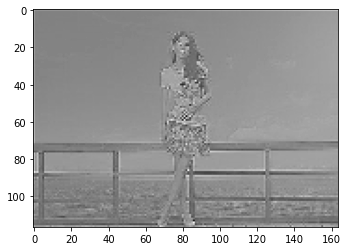

In [28]:
image = gray_img
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])
image_filtered = convolve2d(image,kernel,(1,1),(2,2))
plt.imshow(image_filtered, cmap=plt.cm.gray)
print("原图像大小：",image.shape)
print("结果图像大小：",image_filtered.shape)

### 6.1.4 多输入通道和多输出通道

3D卷积操作的代码实现：

In [29]:
def convolve3d(X, K,P=(0,0),S=(1,1)): 
    C,H,W = X.shape
    C,F_h,F_w = K.shape
    P_h,P_w = P[0],P[1]
    S_h,S_w = S[0],S[1]   
  
    h = (H+2*P_h-F_h)//S_h+1
    w = (W+2*P_w-F_w)//S_w+1
    Y = np.zeros((h,w))            # convolution output
   
    if P_h!=0 or  P_w != 0:  
        #X_padded = np.zeros((C,H + 2*P_h, W +2*P_w)) 
        #X_padded[:,P_h:-P_h, P_w:-P_w] = X
        X_padded = np.pad(X,[(0,0),(P_h,P_h),(P_w,P_w)], mode='constant')
    else:
        X_padded = X
    
    for i in range(h):     # Loop over every pixel of the image  
        hs = i*S_h
        for j in range(w):   
            ws = j*S_w
            # element-wise multiplication of the kernel and the image
            Y[i,j]=(K*X_padded[:,hs:hs+F_h, ws:ws+F_w]).sum()        
    return Y

In [30]:
X= np.array([[[1, 2, 3], [4, 5, 6], [7, 8, 9]],
[[11, 12, 13], [14, 15, 16], [17, 18, 19]]])
K = np.array([[[1, 3], [2, 4]], [[4, -3], [2, 1]]])
convolve3d(X,K)

array([[ 86., 100.],
       [128., 142.]])

读取一幅彩色图像：

image matrix size:  (330, 330, 3)


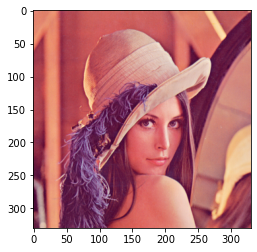

In [32]:
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

lenna_img = io.imread('lenna.png', as_gray=False)  # load the image as grayscale
plt.imshow(lenna_img) #, cmap='gray')
print('image matrix size: ', lenna_img.shape)      # print the size of image

(3, 330, 330)
(330, 330)


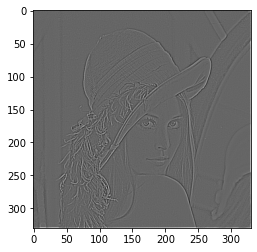

In [33]:
X = np.moveaxis(lenna_img, -1, 0)  #np.rollaxis(lenna_img, 2, 0)
kernel = np.array([[[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],
                   [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],
                   [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]] )
edges = convolve3d(X,kernel,(1,1))
print(X.shape)
print(edges.shape)
plt.imshow(edges,cmap=plt.cm.gray)

对3通道的彩色图像执行3D卷积操作，产生一个单通道的黑白图像：

### 6.1.5 池化
同卷积⼀样，**池化**(**pooling**)也是用一个固定形状窗口（称**池化窗口**）对准数据并计算出数据窗口的输出值。不同于卷积的输⼊数据和核的加权和，池化直接计算数据的池化窗口内元素的最⼤值或者平均值。

和卷积操作一样，池化操作不仅有跨度，也可以对原始图像先填充再进行池化。类似于卷积操作，可以写出下面的对单通道的输入数据X执行池化操作的代码：

In [34]:
def pool2d(X, pool, stride=(1,1),padding=(0,0), mode='max'):
    pool_h, pool_w = pool
    S_h,S_w = stride
    P_h,P_w = padding
    
    #填充
    if P_h or P_w:
        X_padded = np.pad(X,[(P_h,P_h),(P_w,P_w)], mode='constant')
    else:
        X_padded = X
    
    #执行池化操作
    Y_h,Y_w =  (X.shape[0]-pool_h+2*P_h)//S_h+1,(X.shape[1]-pool_w+2*P_w)//S_w+1        
    Y = np.zeros((Y_h,Y_w ),dtype = X.dtype)
    for i in range(Y.shape[0]):
        hs = i*S_h
        for j in range(Y.shape[1]):
            ws = j*S_h
            if mode == 'max':  #最大池化
                Y[i, j] = X[hs: hs + pool_h, ws: ws + pool_w].max()
            elif mode == 'avg':
                Y[i, j] = X[hs: hs + pool_h, ws: ws + pool_w].mean()
    return Y

对二维矩阵执行跨度为3，窗口为$3\times 3$的最大值和平均化池化的结果如下：

In [35]:
X= np.array([[2,3,0,7,9,5], [6,0,4,7,2,3], [8,1,0,3,2,6],
             [7,6,1,5,2,8], [9,5,1,8,3,7], [2,4,1,8,6,5]])
pool2d(X,(3,3),(3,3),(0,0),mode ='max')

array([[8, 9],
       [9, 8]])

执行平均池化：

In [36]:
pool2d(X,(3,3),(3,3),(0,0),mode ='avg')

array([[2, 4],
       [4, 5]])

对于多通道的输入，只要对每个通道执行上面的单通道池化操作就可以了，下面的对多通道的输入数据X执行池化操作在原来的池化操作循环的外层增加了多通道进行遍历的循环（`for c in range(Y.shape[0])`）：

In [37]:
def pool(X, pool, stride=(1,1),padding=(0,0), mode='max'):
    pool_h, pool_w = pool
    S_h,S_w = stride
    P_h,P_w = padding
    
    if P_h or P_w:
        X_padded = np.pad(X,[(0,0),(P_h,P_h),(P_w,P_w)], mode='constant')
    else:
        X_padded = X
    
    Y_h,Y_w =  (X.shape[1]-pool_h+2*P_h)//S_h+1,(X.shape[1]-pool_w+2*P_w)//S_w+1
        
    Y = np.zeros((X.shape[0],Y_h,Y_w ),dtype = X.dtype)
    print(X.shape)
    print(Y.shape)
  
    for c in range(Y.shape[0]):
        for i in range(Y.shape[1]):
            hs = i*S_h
            for j in range(Y.shape[2]):
                ws = j*S_w
                if mode == 'max':
                    Y[c,i, j] = X[c,hs: hs + pool_h, ws: ws + pool_w].max()
                elif mode == 'avg':
                    Y[c,i, j] = X[c,hs: hs + pool_h, ws: ws + pool_w].mean()
    return Y

测试上述的多通道输入的池化操作函数pool()：

In [38]:
X3= np.array([[[0, 1, 2], [3, 4, 5], [6, 7, 8]],
[[11, 2, 3], [4, 1, 16], [71, 8, 9]]])
print(X3)
pool(X3,(2,2),(2,2),(0,0),mode ='max')

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[11  2  3]
  [ 4  1 16]
  [71  8  9]]]
(2, 3, 3)
(2, 1, 1)


array([[[ 4]],

       [[11]]])

用pool()函数和$5\times5$窗口以跨度`(2,2)`对图像池化，产生的结果图像只有原图像一半大小。

(3, 330, 330)
(3, 163, 163)
原图像大小： (3, 330, 330)
结果图像大小： (163, 163, 3)


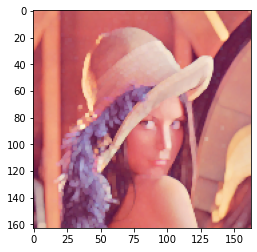

In [39]:
img = np.moveaxis(lenna_img, -1, 0)  #np.rollaxis(lenna_img, 2, 0)
pooled_img = pool(img,[5,5],(2,2))
pooled_img = np.moveaxis(pooled_img, 0, -1) # 将通道axis = 0移到最后的axis=-1的位置
plt.imshow(pooled_img, cmap=plt.cm.gray)
print("原图像大小：",img.shape)
print("结果图像大小：",pooled_img.shape)

## 6.2 卷积神经网络

### 6.2.3 卷积层和池化层的反向求导及代码实现

对于一维数据，完整的反向求导代码如下：

In [40]:
def conv_backward(dz,x,w,p=0,s=1):
    n, K = len(x),len(w)
    o_n = 1 + (n + 2 * p - K) // s
    assert(o_n==len(dz))    
    
    dx = np.zeros_like(x)
    dw = np.zeros_like(w)
    db = dz[:].sum()
    
    x_pad = np.pad(x, [(pad,pad)], 'constant')
    dx_pad = np.zeros_like(x_pad)
        
    for i in range(o_n):
        start = i * s
        dw += x_pad[start:start+K]*dz[i]
        dx_pad[start:start+K] += w*dz[i]
    dx = dx_pad[pad:-pad]    
    return dx, dw, db

下列代码测试一下上面的函数：

In [41]:
import numpy as np
np.random.seed(231)
x = np.random.randn(5)
w = np.random.randn(3)
stride = 2
pad = 1
dz = np.random.randn(5)

print(dz)

dx, dw, db = conv_backward(dz,x,w,1)
print(dx)
print(dw)
print(db)

[-1.4255293  -0.3763567  -0.34227539  0.29490764 -0.83732373]
[ 0.50522405 -2.33230266 -0.87796042 -0.03246064  0.67446745]
[-0.56864738 -0.65679696 -1.09889311]
-2.6865774833459617


表示卷积层的类Conv

In [51]:
import numpy as np
from init_weights import *

class Layer:
    def __init__(self):
        self.params = None
        pass
    def forward(self, x):       
        raise NotImplementedError
    def backward(self, x, grad):        
        raise NotImplementedError
    def reg_grad(self,reg):
        pass
    def reg_loss(self,reg):
        return 0.  
    def reg_loss_grad(self,reg):
        return 0       
        
class Conv(Layer):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,padding=0):
            super().__init__()
            self.C = in_channels
            self.F = out_channels
            self.K = kernel_size
            self.S = stride
            self.P = padding  
            # filters is a 3d array with dimensions (num_filters, self.K, self.K)
            # you can also use Xavier Initialization.
            self.W = np.random.randn(self.F, self.C, self.K, self.K) #/(self.K*self.K)
            self.b = np.random.randn(self.F,)
            self.params = [self.W,self.b]
            self.grads = [np.zeros_like(self.W),np.zeros_like(self.b)]
            self.X = None
            self.reset_parameters()
            
    def reset_parameters(self):
        kaiming_uniform(self.W, a=math.sqrt(5))
        if self.b is not None:
            #fan_in, _ = calculate_fan_in_and_fan_out(self.K)
            fan_in = self.C
            bound = 1 / math.sqrt(fan_in)
            self.b[:] = np.random.uniform(-bound,bound,(self.b.shape))
            
    def forward(self, X): 
        self.X = X
        N, C, X_h, X_w = self.X.shape
        F, _, F_h, F_w = self.W.shape    
   #     print(self.X.shape,self.W.shape )
        
       
        X_pad = np.pad(self.X, ((0,0), (0, 0), (self.P, self.P),(self.P, self.P)), mode='constant', constant_values=0)
        
        O_h = 1 + int((X_h + 2 * self.P - F_h) / self.S)
        O_w = 1 + int((X_w + 2 * self.P - F_w) / self.S)
        O = np.zeros((N, F, O_h, O_w))

        for n in range(N):
            for f in range(F):
                for i in range(O_h):
                    hs = i * self.S
                    for j in range(O_w):
                        ws = j * self.S                                         
                        O[n, f, i, j] = (X_pad[n, :, hs:hs+F_h, ws:ws+F_w]*self.W[f]).sum() + self.b[f]                   
 
        return O  

    def __call__(self,X):
        return self.forward(X)
    
    def backward(self,dZ):        
        """ A naive implementation of the backward pass for a convolutional layer. 
        Inputs: - dout: Upstream derivatives.
        - cache: A tuple of (x, w, b, conv_param) as in conv_forward_naive Returns a tuple of: 
        - dx: Gradient with respect to x - dw: Gradient with respect to w - db: Gradient with respect to b """
        N, F, Z_h, Z_w = dZ.shape
        N, C, X_h, X_w = self.X.shape
        F, _, F_h, F_w = self.W.shape 
        
        pad  = self.P 
        
        H_ = 1 + (X_h + 2 * pad - F_h) // self.S
        W_ = 1 + (X_w + 2 * pad - F_w) // self.S
               
        
        dX = np.zeros_like(self.X)
        dW = np.zeros_like(self.W)
        db = np.zeros_like(self.b)
    
        X_pad = np.pad(self.X, [(0,0), (0,0), (pad,pad), (pad,pad)], 'constant')
        dX_pad = np.pad(dX, [(0,0), (0,0), (pad,pad), (pad,pad)], 'constant')
                        
        for n in range(N):
            for f in range(F):
                db[f] += dZ[n, f].sum()
                for i in range(H_):
                    hs = i * self.S
                    for j in range(W_):
                        ws = j * self.S       
                        # w [f,c,i,j]  X[n,c,i,j]
                        dW[f] += X_pad[n, :, hs:hs+F_h, ws:ws+F_w]*dZ[n, f, i, j] 
                        dX_pad[n, :, hs:hs+F_h, ws:ws+F_w] += self.W[f] * dZ[n, f, i, j]  
       
        # "Unpad"
        dX = dX_pad[:, :, pad:pad+X_h, pad:pad+X_h]
        

        self.grads[0] += dW
        self.grads[1] += db
        return dX
       # return dX, dW, db
    
     #--------添加正则项的梯度-----
    def reg_grad(self,reg):
        self.grads[0]+= 2*reg * self.W
        
    def reg_loss(self,reg):
        return  reg*np.sum(self.W**2)
    
    def reg_loss_grad(self,reg):
        self.grads[0]+= 2*reg * self.W
        return  reg*np.sum(self.W**2)

In [52]:
np.random.seed(1)
x = np.random.randn(4, 3, 5, 5)

conv = Conv(3,2,3,1,1)
f = conv.forward(x)
print(f.shape)
print(f[0,0],"\n")

(4, 2, 5, 5)
[[ 0.46362714 -0.83578144  0.40298519 -0.32152652  0.56616046]
 [-0.47878018  1.02346756  0.20004975  0.59663092  0.25253169]
 [-0.39733747 -0.08368194  0.52454712  0.54133918 -0.32698456]
 [ 0.47703053 -0.01967369  1.13655418  0.22321357  0.77693417]
 [-0.23944267  0.62971182 -0.38411731  0.42818679 -0.07566246]] 



反向求导backward()需要来自损失函数关于输出f的梯度$\frac{\partial \mathcal{L} }{\partial f}$，才能计算损失函数关于卷积的参数（$\pmb W,\pmb b$）和（$\pmb X$）的梯度。为测试该方法，下面代码给它输入一个模拟的梯度，记为$df = \frac{\partial \mathcal{L} }{\partial \pmb f}$。

In [53]:
df = np.random.randn(4, 2, 5, 5)
dx= conv.backward(df)
print(df[0,0],"\n")
print(dx[0,0],"\n")
print(conv.grads[0][0,0],"\n")
print(conv.grads[1],"\n")

[[-1.30653407  0.07638048  0.36723181  1.23289919 -0.42285696]
 [ 0.08646441 -2.14246673 -0.83016886  0.45161595  1.10417433]
 [-0.28173627  2.05635552  1.76024923 -0.06065249 -2.413503  ]
 [-1.77756638 -0.77785883  1.11584111  0.31027229 -2.09424782]
 [-0.22876583  1.61336137 -0.37480469 -0.74996962  2.0546241 ]] 

[[-1.28063939e-02 -3.66152720e-01  8.60100186e-02 -1.22187599e-01
  -9.82733000e-02]
 [ 1.56875134e-01 -1.50855186e-01 -9.11041554e-04 -3.84484585e-01
   7.94984888e-02]
 [-5.68530426e-01  4.20951048e-01  5.41634150e-01  7.61553975e-01
  -5.97223756e-01]
 [ 1.85998058e-01 -3.13055184e-01 -1.49268149e-01 -7.67989087e-01
   3.10833619e-01]
 [ 3.84377541e-02  6.33352468e-01 -3.20074728e-01 -9.61297590e-01
   9.84565706e-01]] 

[[-12.64870544   7.33773197  -3.47470049]
 [  4.76851832 -18.31687439   3.59104687]
 [ -3.28925017   0.94823861  -5.66853535]] 

[11.528173    7.46555585] 



卷积层的反向求导比较复杂，可用之前的util.py里的数值梯度函数numerical_gradient_from_df()函数计算数值梯度和反向求导的分析梯度进行比较，来检查反向求导是否正确。

In [54]:
from util import *
import util
def f():
   return conv.forward(x)

dw_num = util.numerical_gradient_from_df(f,conv.W,df)
diff_error = lambda x, y: np.max(np.abs(x - y)) 
print(diff_error(conv.grads[0],dw_num))

db_num = util.numerical_gradient_from_df(lambda :conv.forward(x),conv.b,df)
print(diff_error(conv.grads[1],db_num))

dx_num = util.numerical_gradient_from_df(lambda :conv.forward(x),x,df)
print(diff_error(dx,dx_num))

6.533440455314121e-11
3.7474023883987684e-11
3.998808228988793e-11


In [55]:
class Pool(Layer):
    def __init__(self, pool_param = (2,2,2)):
        super().__init__()
        self.pool_h,self.pool_w,self.stride = pool_param
    def forward(self, x): 
        self.x = x    
        N, C, H, W = x.shape
        
        pool_h,pool_w,stride= self.pool_h,self.pool_w,self.stride
        
        h_out = 1 + (H - pool_h) // stride
        w_out = 1 + (W - pool_w) // stride         
        out = np.zeros((N, C, h_out, w_out))
        
        for n in range(N):
            for c in range(C):
                for i in range(h_out):
                    si = stride*i  
                    for j in range(w_out):
                        sj = stride*j 
                        x_win = x[n, c, si:si+pool_h, sj:sj+pool_w]  
                        out[n,c,i,j] = np.max(x_win)        
     
        return out
    
    def backward(self,dout):
        out = None
        x = self.x
        N, C, H, W = x.shape
        kH,kW,stride = self.pool_h,self.pool_w,self.stride      
        oH = 1 + (H - kH) // stride
        oW = 1 + (W - kW) // stride
       
        dx = np.zeros_like(x)    
  
        for k in range(N):
            for l in range(C):
                for i in range(oH):
                    si = stride * i
                    for j in range(oW):
                        sj = stride * j
                        slice = x[k,l,si:si+kH,sj:sj+kW]
                        slice_max = np.max(slice)
                        dx[k,l,si:si+kH,sj:sj+kW] += (slice_max==slice)*dout[k,l,i,j] 
                    
        return dx

同样，可以用数值梯度来验证pool类的分析梯度的正确性：

In [56]:
x = np.random.randn(3, 2, 8, 8)
df = np.random.randn(3, 2, 4, 4)

pool = Pool((2,2,2))
f = pool.forward(x)
dx = pool.backward(df)

dx_num = util.numerical_gradient_from_df(lambda :pool.forward(x),x,df)
print(diff_error(dx,dx_num))

1.680655614677562e-11


### 6.2.4 卷积神经网络的实现

在已经实现的卷积层、池化层和全连接层基础上，可以实现一个表示卷积神经网络的类的ConvNetwork

In [57]:
class NeuralNetwork:   
    def __init__(self):
        self._layers = []
        self._params = []
 
    def add_layer(self, layer):      
        self._layers.append(layer)
        if layer.params: 
            for  i, _ in enumerate(layer.params):                         
                self._params.append([layer.params[i],layer.grads[i]])  
                
    def forward(self, X): 
        for layer in self._layers:            
            X = layer.forward(X) 
        return X   
    
    def __call__(self, X):
        return self.forward(X)
    
    def predict(self, X):
        p = self.forward(X)       
        if p.ndim == 1:     #单样本
            return np.argmax(ff)   
        return np.argmax(p, axis=1)
    
    def backward(self,loss_grad,reg = 0.):
        for i in reversed(range(len(self._layers))):
            layer = self._layers[i] 
            loss_grad = layer.backward(loss_grad)
            layer.reg_grad(reg) 
        return loss_grad
    
    def reg_loss(self,reg):
        reg_loss = 0
        for i in range(len(self._layers)):
            reg_loss+=self._layers[i].reg_loss(reg)
        return reg_loss
    
    def parameters(self): 
        return self._params
    
    def zero_grad(self):
        for i,_ in enumerate(self._params):
            self._params[i][1] *= 0. 

下面的代码定义了一个简单的全连接神经网络对二维平面点集spiral数据集进行分类训练：

In [58]:
import  util
import train
import data_set
from Layers import *

np.random.seed(1)

nn = NeuralNetwork()
nn.add_layer(Dense(2, 100))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 3)) 

X,y = data_set.gen_spiral_dataset(N=100,D=2,K=3)

learning_rate = 1e-1
momentum = 0.9
optimizer = train.SGD(nn.parameters(),learning_rate,momentum)

epochs=5000
batch_size = len(X)
reg = 0.5e-3
print_n=300

losses = train.train_nn(nn,X,y,optimizer,util.cross_entropy_grad_loss,epochs,batch_size,reg,print_n)

print(np.mean(nn.predict(X)==y))

[    1, 1] loss: 1.123
[  301, 301] loss: 0.292
[  601, 601] loss: 0.259
[  901, 901] loss: 0.249
[ 1201, 1201] loss: 0.244
[ 1501, 1501] loss: 0.242
[ 1801, 1801] loss: 0.241
[ 2101, 2101] loss: 0.241
[ 2401, 2401] loss: 0.240
[ 2701, 2701] loss: 0.240
[ 3001, 3001] loss: 0.240
[ 3301, 3301] loss: 0.240
[ 3601, 3601] loss: 0.239
[ 3901, 3901] loss: 0.239
[ 4201, 4201] loss: 0.239
[ 4501, 4501] loss: 0.239
[ 4801, 4801] loss: 0.239
0.99


为了测试卷积层，首先读取对Mnist手写数字训练集：

In [59]:
import pickle, gzip, urllib.request, json
import numpy as np
import os.path

if not os.path.isfile("mnist.pkl.gz"):
    # Load the dataset
    urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
    
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

train_X, train_y = train_set
print(train_X.shape)
train_X = train_X.reshape((train_X.shape[0],1,28,28))
print(train_X.shape)

(50000, 784)
(50000, 1, 28, 28)


定义如下的卷积神经网络对Mnist手写数字识别进行分类训练，

In [60]:
import train
#from NeuralNetwork import *
import time

np.random.seed(1)

#nn = ConvNetwork()
nn = NeuralNetwork()                    
nn.add_layer(Conv(1,2,5,1,0))    # 1*28*28-> 2*24*24       # 1*2828-> 8*24*24
nn.add_layer(Pool((2,2,2)))           #        ->2*12*12    #       ->8*12*12
nn.add_layer(Conv(2,4,5,1,0))    #        ->4*8*8    ->16*8*8
nn.add_layer(Pool((2,2,2)))           #        ->4*4*4      # ->16*4*4
nn.add_layer(Dense(64, 100))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 10)) 

learning_rate = 1e-3 #1e-1
momentum = 0.9
optimizer = train.SGD(nn.parameters(),learning_rate,momentum)

epochs=1
batch_size = 64
reg = 1e-3
print_n=100

start = time.time()

X,y  =train_X,train_y

losses = train.train_nn(nn,X,y,optimizer,util.cross_entropy_grad_loss,epochs,batch_size,reg,print_n)

done = time.time()
elapsed = done - start
print(elapsed)

print(np.mean(nn.predict(X)==y))

[    1, 1] loss: 2.340
[  101, 1] loss: 2.329
[  201, 1] loss: 2.338
[  301, 1] loss: 2.288
[  401, 1] loss: 2.189
[  501, 1] loss: 1.747
[  601, 1] loss: 0.804
[  701, 1] loss: 0.755
1419.1755061149597
0.84064


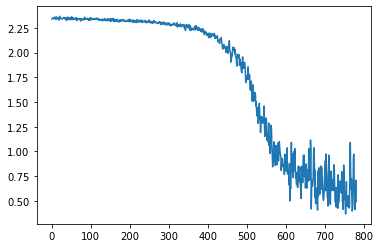

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(losses)

## 6.3 快速卷积
### 6.3.1  1D样本卷积的矩阵乘法
### 6.3.2  2D样本卷积的矩阵乘法

下面是完整的将一个已经填充后的四维张量转化为二维矩阵的代码：

In [62]:
def im2row(x, kH,kW, S=1):
    N, C,H, W = x.shape
    oH = (H - kH) // S + 1
    oW = (W - kW) // S + 1
    row = np.empty((N * oH * oW, kH * kW * C))
    oSize =   oH*oW
    
    for h in range(oH):
        hS = h * S
        hS_kH = hS + kH
        h_start = h*oW
        for w in range(oW):
            wS = w*S
            patch = x[:,:,hS:hS_kH,wS:wS+kW]
            row[h_start+w::oSize,:] = np.reshape(patch,(N,-1))
    return row

用一个单样本多通道的四维张量测试一下这个函数：

In [63]:
x = np.arange(18).reshape(1,2,3,3)
print(x)
x_row = im2row(x,2,2)
print(x_row)

[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]]
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]]


再测试一下多样本多通道的4维张量：

In [65]:
x = np.arange(36).reshape(2,2,3,3)
print(x)
x_row = im2row(x,2,2)
print(x_row)

[[[[ 0  1  2]
   [ 3  4  5]
   [ 6  7  8]]

  [[ 9 10 11]
   [12 13 14]
   [15 16 17]]]


 [[[18 19 20]
   [21 22 23]
   [24 25 26]]

  [[27 28 29]
   [30 31 32]
   [33 34 35]]]]
[[ 0.  1.  3.  4.  9. 10. 12. 13.]
 [ 1.  2.  4.  5. 10. 11. 13. 14.]
 [ 3.  4.  6.  7. 12. 13. 15. 16.]
 [ 4.  5.  7.  8. 13. 14. 16. 17.]
 [18. 19. 21. 22. 27. 28. 30. 31.]
 [19. 20. 22. 23. 28. 29. 31. 32.]
 [21. 22. 24. 25. 30. 31. 33. 34.]
 [22. 23. 25. 26. 31. 32. 34. 35.]]


可以用矩阵乘法实现卷积层的卷积运算，代码如下：

In [66]:
def conv_forward(X, K, S=1, P=0):
    N,C, H, W  = X.shape
    F,C, kH,kW = K.shape
    if P==0:
        X_pad = X
    else:
        X_pad = np.pad(X, ((0, 0), (0, 0),(P, P), (P, P)), 'constant')
   
    X_row = im2row(X_pad, kH,kW, S)
    
    K_col = K.reshape(K.shape[0],-1).transpose()    
    Z_row = np.dot(X_row, K_col)
    
    oH = (X_pad.shape[2] - kH) // S + 1
    oW = (X_pad.shape[3] - kW) // S + 1
    
    Z = Z_row.reshape(N,oH,oW,-1)
    Z = Z.transpose(0,3,1,2)
    return Z    

测试一下这个函数：

In [67]:
x = np.arange(9).reshape(1,1,3,3)+1
k = np.arange(4).reshape(1,1,2,2)+1
print(x)
print(k)
z = conv_forward(x,k)
print(z.shape)
print(z)

[[[[1 2 3]
   [4 5 6]
   [7 8 9]]]]
[[[[1 2]
   [3 4]]]]
(1, 1, 2, 2)
[[[[37. 47.]
   [67. 77.]]]]


再测试一下多样本多通道的数据：

In [68]:
x = np.arange(36).reshape(2,2,3,3)
k = np.arange(16).reshape(2,2,2,2)
z = conv_forward(x,k)
print(z.shape)
print(z)

(2, 2, 2, 2)
[[[[ 268.  296.]
   [ 352.  380.]]

  [[ 684.  776.]
   [ 960. 1052.]]]


 [[[ 772.  800.]
   [ 856.  884.]]

  [[2340. 2432.]
   [2616. 2708.]]]]


### 6.3.4  2D卷积反向求导的矩阵乘法

从$d\pmb X_{row}$按照摊平的逆过程得到$d\pmb X$可以实现为下面函数row2im()。

In [70]:
def row2im(dx_row,oH,oW,kH,kW,S):
    nRow,K2C = dx_row.shape[0],dx_row.shape[1]
    C = K2C//(kH*kW)
    N = nRow//(oH*oW)     #样本个数    
    oSize = oH*oW  
    H = (oH - 1) * S + kH
    W = (oW - 1) * S + kW
    dx = np.zeros([N,C,H,W])
    for i in range(oSize):
        row = dx_row[i::oSize,:]  #N个行向量       
        h_start = (i // oW) * S
        w_start = (i % oW) * S     
        dx[:,:,h_start:h_start+kH,w_start:w_start+kW] += row.reshape((N,C,kH,kW))  #np.reshape(row,(C,kH,kW))
    return dx

row2im()函数也可以写成下面的形式：

In [71]:
def row2im(dx_row,oH,oW,kH,kW,S):
    nRow,K2C = dx_row.shape[0],dx_row.shape[1]
    C = K2C//(kH*kW)
    N = nRow//(oH*oW)     #样本个数    
    oSize = oH*oW  
       
    H = (oH - 1) * S + kH
    W = (oW - 1) * S + kW
    dx = np.zeros([N,C,H,W])
    for h in range(oH):
        hS = h * S
        hS_kH = hS + kH
        h_start = h*oW
        for w in range(oW):
            wS = w*S          
            row =dx_row[h_start+w::oSize,:]                    
            dx[:,:,hS:hS_kH,wS:wS+kW] += row.reshape(N,C,kH,kW)          
    return dx

In [72]:
def row2im(dx_row,oH,oW,kH,kW,S):
    nRow,K2C = dx_row.shape[0],dx_row.shape[1]
    C = K2C//(kH*kW)
    N = nRow//(oH*oW)     #样本个数    
    oSize = oH*oW  
       
    H = (oH - 1) * S + kH
    W = (oW - 1) * S + kW
    dx = np.zeros([N,C,H,W])
    for h in range(oH):
        hS = h * S
        hS_kH = hS + kH
        h_start = h*oW
        for w in range(oW):
            wS = w*S          
            row =dx_row[h_start+w::oSize,:]                    
            dx[:,:,hS:hS_kH,wS:wS+kW] += row.reshape(N,C,kH,kW)          
    return dx

可以用下面的代码测试一下上面的函数row2im()：

In [73]:
kH,kW = 2,2
oH,oW = 3,3
N  = 1
C = 2
S  =1
P = 0
nRow = oH*oW*N
K2C = C*kH*kW

a = np.arange(nRow*K2C).reshape(nRow,K2C)
#dx_row = np.arange(nRow*K2C).reshape(nRow,K2C)
dx_row = np.vstack((a,a))
print("dx_row",dx_row)

print(dx_row.shape)
dx = row2im(dx_row,oH,oW,kH,kW,S)
print(dx.shape)
print("dx[0,0,:,:]:",dx[0,0,:,:])


dx_row [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71]
 [ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]
 [64 65 66 67 68 69 70 71]]
(18, 8)
(2, 2, 4, 4)
dx[0,0,:,:]: [[  0.   9.  25.  17.]
 [ 26.  70. 102.  60.]
 [ 74. 166. 198. 108.]
 [ 50. 109. 125.  67.]]


基于上面的讨论，卷积层的反向求导代码如下：

In [74]:
def conv_backward(dZ,K,oH,oW,kH,kW,S=1,P=0):
    #将dZ摊平为和Z_row形状一样的矩阵
    F = dZ.shape[1]  # 将(N,F,oH,oW)转化为(N,oH,oW,F)
    dZ_row = dZ.transpose(0,2,3,1).reshape(-1,F)
    
    #计算损失函数关于卷积核参数的梯度   
    dK_col = np.dot(X_row.T,dZ_row) #X_row.T@dZ_row
    dK_col = dK_col.transpose(1,0)
    dK = dK_col.reshape(K.shape)
    db = np.sum(dZ,axis=(0,2,3))
    db = db.reshape(-1,F)
    
    K_col = K.reshape(K.shape[0],-1).transpose()  
    dX_row = np.dot(dZ_row,K_col.T)
    
    dX_pad = row2im(dX_row,oH,oW,kH,kW,S)
    if P == 0:
        return dX_pad,dK,db
    return dX_pad[:, :, P:-P, P:-P],dK,db    

下面的代码测试上述的卷积反向求导函数conv_backward()：

In [75]:
H,W  = 4,4
kH,kW = 2,2
oH,oW = 3,3
N  = 1
C = 3
S  =1
P = 0
F = 4 

dZ = np.arange(N*F*oH*oW).reshape(N,F,oH,oW)
X =  np.arange(N*C*H*W).reshape(N,C,H,W)
if P==0:
    X_pad = X
else:
    X_pad = np.pad(X, ((0, 0), (0, 0),(P, P), (P, P)), 'constant')
K = np.arange(F*C*kH*kW).reshape(F,C,kH,kW)

X_row = im2row(X_pad, kH,kW, S)
dX,dW,db = conv_backward(dZ,K,oH,oW,kH,kW,S,P)   
print(dX.shape)
print("dX[0,0,:,:]:",dX[0,0,:,:])
print(dW.shape)
print("dW[0,0,:,:]:",dW[0,0,:,:])
print(db.shape)
print("db:",db)

(1, 3, 4, 4)
dX[0,0,:,:]: [[1512. 3150. 3298. 1718.]
 [3348. 6968. 7280. 3788.]
 [3804. 7904. 8216. 4268.]
 [2100. 4358. 4522. 2346.]]
(4, 3, 2, 2)
dW[0,0,:,:]: [[258. 294.]
 [402. 438.]]
(1, 4)
db: [[ 36 117 198 279]]


### .3.5 基于坐标索引的快速卷积

In [76]:
import numpy as np
kH,kW = 2,2
i0 = np.repeat(np.arange(kH), kW) #行下标[0,1]沿着列方向重复:[0,0,1,1]
print(i0)
j0 = np.tile(np.arange(kW), kH)   #列下标[0,1]沿着行的方向拼接[0,1,0,1]
print(j0)

[0 0 1 1]
[0 1 0 1]


对于下面的矩阵x，可以用这个i0、j0的组合索引得到左上角数据块的元素。

In [77]:
def idx_matrix(H,W):
    a = np.empty((H,W), dtype='object')
    for i in range(H):
        for j in range(W):
            a[i,j] = str(i)+str(j)
    return a
x = idx_matrix(4,4)
print(x)
print(x[i0,j0])

[['00' '01' '02' '03']
 ['10' '11' '12' '13']
 ['20' '21' '22' '23']
 ['30' '31' '32' '33']]
['00' '01' '10' '11']


一般的，通道数为C的左上角数据块，其元素的行、列下标可以用下面代码生成：

In [78]:
i0 = np.repeat(np.arange(kH), kW)
i0 = np.tile(i0, C)
j0 = np.tile(np.arange(kW), kH * C)

对于C=2，运行该代码:

In [79]:
C  = 2
i0 = np.repeat(np.arange(kH), kW)
i0 = np.tile(i0, C)
j0 = np.tile(np.arange(kW), kH * C)
print(i0)
print(j0)

[0 0 1 1 0 0 1 1]
[0 1 0 1 0 1 0 1]


同样，用生成一个数据块内元素行列坐标的代码可以生成这些跨度坐标：

In [80]:
oH,oW=3,3
i1 = S * np.repeat(np.arange(oH), oW)
j1 = S * np.tile(np.arange(oW), oH)
print(i1)
print(j1)

[0 0 0 1 1 1 2 2 2]
[0 1 2 0 1 2 0 1 2]


左上角数据块的行列坐标，加上这些数据块的跨度坐标，就得到了所有数据块元素在原数据张量中的行列坐标，即：

In [81]:
i = i0.reshape(-1, 1) + i1.reshape(1, -1)
j = j0.reshape(-1, 1) + j1.reshape(1, -1)
print("i0:",i0)
print("i1:",i1)
print(i)

i0: [0 0 1 1 0 0 1 1]
i1: [0 0 0 1 1 1 2 2 2]
[[0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]
 [0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]]


下面是结合跨度坐标和数据块内元素下标得到所有数据块在原输入（单通道）张量中的行列下标的代码：

In [82]:
C=1
S=1
oH,oW=3,3
kH,kW = 2,2

i0 = np.repeat(np.arange(kH), kW)
i0 = np.tile(i0, C)
j0 = np.tile(np.arange(kW), kH * C)

i1 = S * np.repeat(np.arange(oH), oW)
j1 = S * np.tile(np.arange(oW), oH)

i = i0.reshape(-1, 1) + i1.reshape(1, -1)
j = j0.reshape(-1, 1) + j1.reshape(1, -1)
print(i)
print(j)

[[0 0 0 1 1 1 2 2 2]
 [0 0 0 1 1 1 2 2 2]
 [1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]]
[[0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3]
 [0 1 2 0 1 2 0 1 2]
 [1 2 3 1 2 3 1 2 3]]


如果希望每个数据块索引下标成为矩阵的一行，则修改数据块下标和跨度下标是按行还是按列排列，即修改一下reshape代码。

In [83]:
C=1
S=1
oH,oW=3,3
kH,kW = 2,2

i0 = np.repeat(np.arange(kH), kW)
i0 = np.tile(i0, C)
j0 = np.tile(np.arange(kW), kH * C)

i1 = S * np.repeat(np.arange(oH), oW)
j1 = S * np.tile(np.arange(oW), oH)

i = i0.reshape(1,-1) + i1.reshape(-1,1)
j = j0.reshape(1,-1) + j1.reshape(-1,1)
print(i)
print(j)

[[0 0 1 1]
 [0 0 1 1]
 [0 0 1 1]
 [1 1 2 2]
 [1 1 2 2]
 [1 1 2 2]
 [2 2 3 3]
 [2 2 3 3]
 [2 2 3 3]]
[[0 1 0 1]
 [1 2 1 2]
 [2 3 2 3]
 [0 1 0 1]
 [1 2 1 2]
 [2 3 2 3]
 [0 1 0 1]
 [1 2 1 2]
 [2 3 2 3]]


下面代码计算一个数据块的通道坐标：

In [84]:
C=2
k = np.repeat(np.arange(C), kH * kW).reshape(1,-1) #(-1, 1)
print(k)

[[0 0 0 0 1 1 1 1]]


求参与卷积运算的数据块构成的扩展张量的所有元素在原数据张量中的通道坐标k、行下标i和列下标j。函数get_im2row_indices()可得到这些映射坐标(k,i,j)：

In [85]:
import numpy as np
def get_im2row_indices(x_shape, kH, kW, S=1,P=0):  
  N, C, H, W = x_shape
  assert (H + 2 * P - kH) % S == 0
  assert (W + 2 * P - kH) % S == 0
  oH = (H + 2 * P - kH) // S + 1
  oW = (W + 2 * P - kW) // S + 1

  i0 = np.repeat(np.arange(kH), kW)
  i0 = np.tile(i0, C)
  i1 = S * np.repeat(np.arange(oH), oW)
  j0 = np.tile(np.arange(kW), kH * C)
  j1 = S * np.tile(np.arange(oW), oH)
  #i = i0.reshape(-1, 1) + i1.reshape(1, -1)
  #j = j0.reshape(-1, 1) + j1.reshape(1, -1)
  i = i0.reshape(1,-1) + i1.reshape(-1,1)
  j = j0.reshape(1,-1) + j1.reshape(-1,1)

  k = np.repeat(np.arange(C), kH * kW).reshape(1,-1)
  
  return (k, i, j)

下面的代码测试上述的函数：

In [86]:
H,W  = 4,4
kH,kW = 2,2
oH,oW = 3,3
N  = 2
C = 2
S  =1
P = 0
F = 4 

k, i, j = get_im2row_indices((N,C,H,W),kH,kW,S,P)  
print(k.shape) 
print(i.shape)
print(j.shape)

(1, 8)
(9, 8)
(9, 8)


有了这个辅助函数，就可以轻松地从原数据张量生成数据块按行摊平的张量：

In [87]:
def im2row_indices(x, kH, kW, S=1,P=0):  
  x_padded = np.pad(x, ((0, 0), (0, 0), (P, P), (P, P)), mode='constant')
  k, i, j = get_im2row_indices(x.shape, kH, kW, S,P)    
  rows = x_padded[:, k, i, j]           #每个样本的所有数据块
  C = x.shape[1]
  rows = rows.reshape(-1,kH * kW * C)   #第1个样本的所有数据块、第2个样本的所有数据块
  return rows

测试一下这个函数：

In [88]:
X =  np.arange(N*C*H*W).reshape(N,C,H,W)
X_row = im2row_indices(X,kH,kW,S,P)  
print(X)
print(X_row)

[[[[ 0  1  2  3]
   [ 4  5  6  7]
   [ 8  9 10 11]
   [12 13 14 15]]

  [[16 17 18 19]
   [20 21 22 23]
   [24 25 26 27]
   [28 29 30 31]]]


 [[[32 33 34 35]
   [36 37 38 39]
   [40 41 42 43]
   [44 45 46 47]]

  [[48 49 50 51]
   [52 53 54 55]
   [56 57 58 59]
   [60 61 62 63]]]]
[[ 0  1  4  5 16 17 20 21]
 [ 1  2  5  6 17 18 21 22]
 [ 2  3  6  7 18 19 22 23]
 [ 4  5  8  9 20 21 24 25]
 [ 5  6  9 10 21 22 25 26]
 [ 6  7 10 11 22 23 26 27]
 [ 8  9 12 13 24 25 28 29]
 [ 9 10 13 14 25 26 29 30]
 [10 11 14 15 26 27 30 31]
 [32 33 36 37 48 49 52 53]
 [33 34 37 38 49 50 53 54]
 [34 35 38 39 50 51 54 55]
 [36 37 40 41 52 53 56 57]
 [37 38 41 42 53 54 57 58]
 [38 39 42 43 54 55 58 59]
 [40 41 44 45 56 57 60 61]
 [41 42 45 46 57 58 61 62]
 [42 43 46 47 58 59 62 63]]


或者反过来，将数据块按行摊平的张量转化为原数据张量的形状。

In [89]:
def row2im_indices(rows, x_shape, kH, kW, S=1,P=0):
  N, C, H, W = x_shape
  H_pad, W_pad = H + 2 * P, W + 2 * P
  x_pad = np.zeros((N, C,H_pad, W_pad), dtype=rows.dtype)
  k, i, j = get_im2row_indices(x_shape, kH, kW, S,P)
  
  rows_reshaped = rows.reshape(N,-1,C * kH * kW)
 
  np.add.at(x_pad, (slice(None), k, i, j), rows_reshaped)
  if P == 0:
    return x_pad
  return x_pad[:, :, P:-P, P:-P]

In [90]:
import numpy as np

H,W  = 4,4
kH,kW = 2,2
oH,oW = 3,3
N  = 2
C = 2
S  =1
P = 0
#F = 4 

nRow = oH*oW*N
K2C = C*kH*kW

dx_row = X_row.copy()  #np.arange(nRow*K2C).reshape(nRow,K2C)
print("dx_row.shape",dx_row.shape)
#print("dx_row",dx_row)

dx = row2im(dx_row,oH,oW,kH,kW,S)
print("dx.shape",dx.shape)
print("dx[0,0,:,:]",dx[0,0,:,:])

#dx_row = dx_row.transpose()
dX = row2im_indices(dx_row,(N,C,H,W),kH,kW,S,P)
print("dX.shape",dX.shape)
print("dX[0,0,:,:]",dX[0,0,:,:])
print(dX)

dx_row.shape (18, 8)
dx.shape (2, 2, 4, 4)
dx[0,0,:,:] [[ 0.  2.  4.  3.]
 [ 8. 20. 24. 14.]
 [16. 36. 40. 22.]
 [12. 26. 28. 15.]]
dX.shape (2, 2, 4, 4)
dX[0,0,:,:] [[ 0  2  4  3]
 [ 8 20 24 14]
 [16 36 40 22]
 [12 26 28 15]]
[[[[  0   2   4   3]
   [  8  20  24  14]
   [ 16  36  40  22]
   [ 12  26  28  15]]

  [[ 16  34  36  19]
   [ 40  84  88  46]
   [ 48 100 104  54]
   [ 28  58  60  31]]]


 [[[ 32  66  68  35]
   [ 72 148 152  78]
   [ 80 164 168  86]
   [ 44  90  92  47]]

  [[ 48  98 100  51]
   [104 212 216 110]
   [112 228 232 118]
   [ 60 122 124  63]]]]


有了上面的直接将多维张量摊平为矩阵的辅助函数（文件im2row.py中），可以编写一个基于快读卷积操作的卷积层：

In [91]:
from Layers import *
from im2row import *

class Conv_fast():       
    def __init__(self, in_channels, out_channels, kernel_size, stride=1,padding=0):
            super().__init__()
            self.C = in_channels
            self.F = out_channels
            self.kH = kernel_size
            self.kW = kernel_size
            self.S = stride
            self.P = padding  
            # filters is a 3d array with dimensions (num_filters, self.K, self.K)
            # you can also use Xavier Initialization.
            #self.K = np.random.randn(self.F, self.C, self.kH, self.kW) #/(self.K*self.K)
            self.K = np.random.normal(0,1,(self.F, self.C, self.kH, self.kW))
            self.b = np.zeros((1,self.F)) #,1))
            self.params = [self.K,self.b]
            self.grads = [np.zeros_like(self.K),np.zeros_like(self.b)]
            self.X = None
            self.reset_parameters()
            
    def reset_parameters(self):
        kaiming_uniform(self.K, a=math.sqrt(5))
        if self.b is not None:
            #fan_in, _ = calculate_fan_in_and_fan_out(self.K)
            fan_in = self.C
            bound = 1 / math.sqrt(fan_in)
            self.b[:] = np.random.uniform(-bound,bound,(self.b.shape))
            
            
    def forward(self,X):      
         #转化为多通道
        self.X = X
        if len(X.shape)==1:
            X = X.reshape(X.shape[0],1,1,1)
        elif len(X.shape)==2:
            X = X.reshape(X.shape[0],X.shape[1],1,1)
  
        self.N,self.H,self.W = X.shape[0], X.shape[2], X.shape[3]
        S,P,kH,kW = self.S, self.P,self.kH,self.kW
        self.oH = (self.H - kH + 2*P)// S + 1
        self.oW = (self.W - kW + 2*P)// S + 1   
        
        X_shape = (self.N,self.C,self.H,self.W)

        if True:
            self.X_row = im2row_indices(X,self.kH,self.kW,S=self.S,P=self.P)        
        else:
            if P==0:
                X_pad = X
            else:
                X_pad = np.pad(X, ((0, 0), (0, 0),(P, P), (P, P)), 'constant')
            self.X_row = im2row(X_pad, kH,kW, S)    
       
        K_col = self.K.reshape(self.F,-1).transpose()         
        Z_row =  self.X_row @ K_col   + self.b #W_row @ self.X_row + self.b   
       
        Z = Z_row.reshape(self.N,self.oH,self.oW,-1)
        Z = Z.transpose(0,3,1,2)           
        return Z

    def __call__(self,x):
         return self.forward(x)

    def backward(self,dZ): 
        
        if len(dZ.shape)<=2:
            dZ = dZ.reshape(dZ.shape[0],-1,self.oH,self.oW)
        K = self.K
        #将dZ摊平为和Z_row形状一样的矩阵
        F = dZ.shape[1]  # 将(N,F,oH,oW)转化为(N,oH,oW,F)
        assert(F==self.F)
        dZ_row = dZ.transpose(0,2,3,1).reshape(-1,F)
        
        #计算损失函数关于卷积核参数的梯度   
        dK_col = np.dot(self.X_row.T,dZ_row) #X_row.T@dZ_row
        dK_col = dK_col.transpose(1,0)  #将F通道轴从axis=1变为axis=0
        dK = dK_col.reshape(self.K.shape)
        db = np.sum(dZ,axis=(0,2,3))
        db = db.reshape(-1,F)

        #计算损失函数关于卷积层输入的梯度 
        
        K_col = K.reshape(K.shape[0],-1).transpose()  #摊平
        dX_row = np.dot(dZ_row,K_col.T)

        if True:
            X_shape = (self.N,self.C,self.H,self.W)
            dX = row2im_indices(dX_row,X_shape,self.kH,self.kW,S =self.S,P = self.P)     
        else:
            dX_pad = row2im(dX_row,oH,oW,kH,kW,S)
            if P == 0:
                dX =  dX_pad
            dX = dX_pad[:, :, P:-P, P:-P]    
        
        dX = dX.reshape(self.X.shape)
        self.grads[0] += dK
        self.grads[1] += db
                 
        return dX
    
     #--------添加正则项的梯度-----
    def reg_grad(self,reg):
        self.grads[0]+= 2*reg * self.K
        
    def reg_loss(self,reg):
        return  reg*np.sum(self.K**2)
    
    def reg_loss_grad(self,reg):
        self.grads[0]+= 2*reg * self.K
        return  reg*np.sum(self.K**2)

#### 梯度检验

同样，对这个卷积层可以用梯度检验检验代码是否正确：

In [92]:
import util

np.random.seed(1)

N,C,H,W = 4,3,5,5
F,kH,kW = 6,3,3
oH,oW = 3,3
x = np.random.randn(N,C,H,W)
y = np.random.randn(N,F,oH,oW) 

conv = Conv_fast(C,F,kH,1,0)
f = conv.forward(x)

loss,do = util.mse_loss_grad(f,y)
dx = conv.backward(do)

def loss_f():
    f = conv.forward(x)
    loss,do = util.mse_loss_grad(f,y)
    return loss

dW_num = util.numerical_gradient(loss_f,conv.params[0],1e-6)

diff_error = lambda x, y: np.max(np.abs(x - y)/(np.maximum(1e-8, np.abs(x) + np.abs(y) )) )
print(diff_error(conv.grads[0],dW_num))
print("dW",conv.grads[0][:2])
print("dW_num",dW_num[:2])

4.198542114313848e-07
dW [[[[ 1.90074619e+00  8.89343674e-03 -1.41133050e+00]
   [ 9.52031925e+00  4.30414869e+00  3.47828606e-01]
   [ 8.00613543e-01  2.61092491e+00  5.47100877e+00]]

  [[ 9.93385161e-01 -9.75200567e-01  8.38974052e-01]
   [-1.54004886e+00 -2.61334505e+00 -3.25602882e+00]
   [-4.56745810e+00 -5.54062088e+00 -8.84416935e+00]]

  [[ 1.13369140e-01  3.49324890e+00 -4.08963800e+00]
   [ 3.03261514e+00  2.70653447e+00 -3.96369196e-01]
   [ 7.68198498e-01 -6.88892583e+00  1.80311820e+00]]]


 [[[ 2.70714697e+00  7.79058813e+00  3.44251333e+00]
   [-4.95036615e+00 -3.93298244e+00 -2.54547136e+00]
   [ 6.04601218e-01 -1.59437990e+00 -8.97042348e+00]]

  [[ 6.76768113e+00 -2.18631886e+00 -4.03541514e-02]
   [ 1.83888738e+00  4.33482794e-01 -2.24258818e+00]
   [ 6.27679348e+00 -4.88206234e+00 -3.91765947e+00]]

  [[ 4.27699392e-01 -1.72104452e+00  2.71063625e+00]
   [ 2.87661696e+00 -7.94690148e+00  1.76789529e+00]
   [-2.59863725e+00 -1.40208579e+00 -1.58401559e+00]]]]
dW_num

#### 与非加速卷积的时间比较 

为了比较快速卷积与之前的非加速卷积的时间效率，用之前的同样的卷积神经网络对MNist手写数字识别问题进行训练：

In [93]:
from Layers import *
import time
np.random.seed(0)

#N,C,H,W = 64,256,64,64
#F,kH= 128,5
N,C,H,W = 128,16,64,64
F,kH= 32,5
x = np.random.randn(N,C,H,W)
oH = H-kH+1
do = np.random.randn(N,F,oH,oH)

start = time.time()
conv = Conv(C,F,kH)
f = conv(x)
conv.backward(do)
done = time.time()
elapsed = done - start
print(elapsed)

start = time.time()
conv = Conv_fast(C,F,kH)
f = conv(x)
conv.backward(do)
done = time.time()
elapsed = done - start
print(elapsed)

274.7444648742676
24.393488883972168


将前面的对MNist手写数字分类的卷积神经网络的卷积换成快速卷积，看一下时间效率：

In [94]:
import pickle, gzip, urllib.request, json
import numpy as np
import os.path

if not os.path.isfile("mnist.pkl.gz"):
    # Load the dataset
    urllib.request.urlretrieve("http://deeplearning.net/data/mnist/mnist.pkl.gz", "mnist.pkl.gz")
    
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

train_X, train_y = train_set
print(train_X.shape)
train_X = train_X.reshape((train_X.shape[0],1,28,28))
print(train_X.shape)

(50000, 784)
(50000, 1, 28, 28)


定义一个卷积神经网络并训练：

In [95]:
import train
from NeuralNetwork import *
import time

np.random.seed(1)

nn = NeuralNetwork()                       
nn.add_layer(Conv_fast(1,2,5,1,0))    # 1*2828-> 2*24*24       # 1*2828-> 8*24*24
nn.add_layer(Pool((2,2,2)))           #        ->2*12*12    #       ->8*12*12
nn.add_layer(Conv_fast(2,4,5,1,0))    #        ->4*8*8    ->16*8*8
nn.add_layer(Pool((2,2,2)))           #        ->4*4*4      # ->16*4*4
nn.add_layer(Dense(64, 100))
nn.add_layer(Relu())
nn.add_layer(Dense(100, 10)) 

learning_rate = 1e-3 #1e-1
momentum = 0.9
optimizer = train.SGD(nn.parameters(),learning_rate,momentum)

epochs=1
batch_size = 64
reg = 1e-3
print_n=100

start = time.time()
X,y  =train_X,train_y
losses = train.train_nn(nn,X,y,optimizer,util.cross_entropy_grad_loss,epochs,batch_size,reg,print_n)
done = time.time()
elapsed = done - start
print(elapsed)

print(np.mean(nn.predict(X)==y))

[    1, 1] loss: 2.383
[  101, 1] loss: 2.316
[  201, 1] loss: 2.283
[  301, 1] loss: 2.160
[  401, 1] loss: 1.675
[  501, 1] loss: 1.091
[  601, 1] loss: 0.514
[  701, 1] loss: 0.659
472.87989020347595
0.83898


In [96]:
x = np.arange(32).reshape(2,4,4)
print(x)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]
  [24 25 26 27]
  [28 29 30 31]]]


In [97]:
k = [0,0,1,1,0,0,1,1]
j = [0,1,0,1,2,3,2,3]
y = x[:,k,j]
print(y)
y.reshape(-1,4) 

[[ 0  1  4  5  2  3  6  7]
 [16 17 20 21 18 19 22 23]]


array([[ 0,  1,  4,  5],
       [ 2,  3,  6,  7],
       [16, 17, 20, 21],
       [18, 19, 22, 23]])

In [98]:
192*28*28*16+5*5*16*28*28*32

12443648

In [84]:
5*5*192*28*28*32

120422400